In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
data=pd.read_csv("AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [2]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [3]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.shape

(144, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
data=pd.read_csv("AirPassengers.csv",parse_dates=[0],index_col='Month')
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
data.rename(columns={'#Passengers' : 'Passengers'},inplace=True)

In [10]:
data['Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

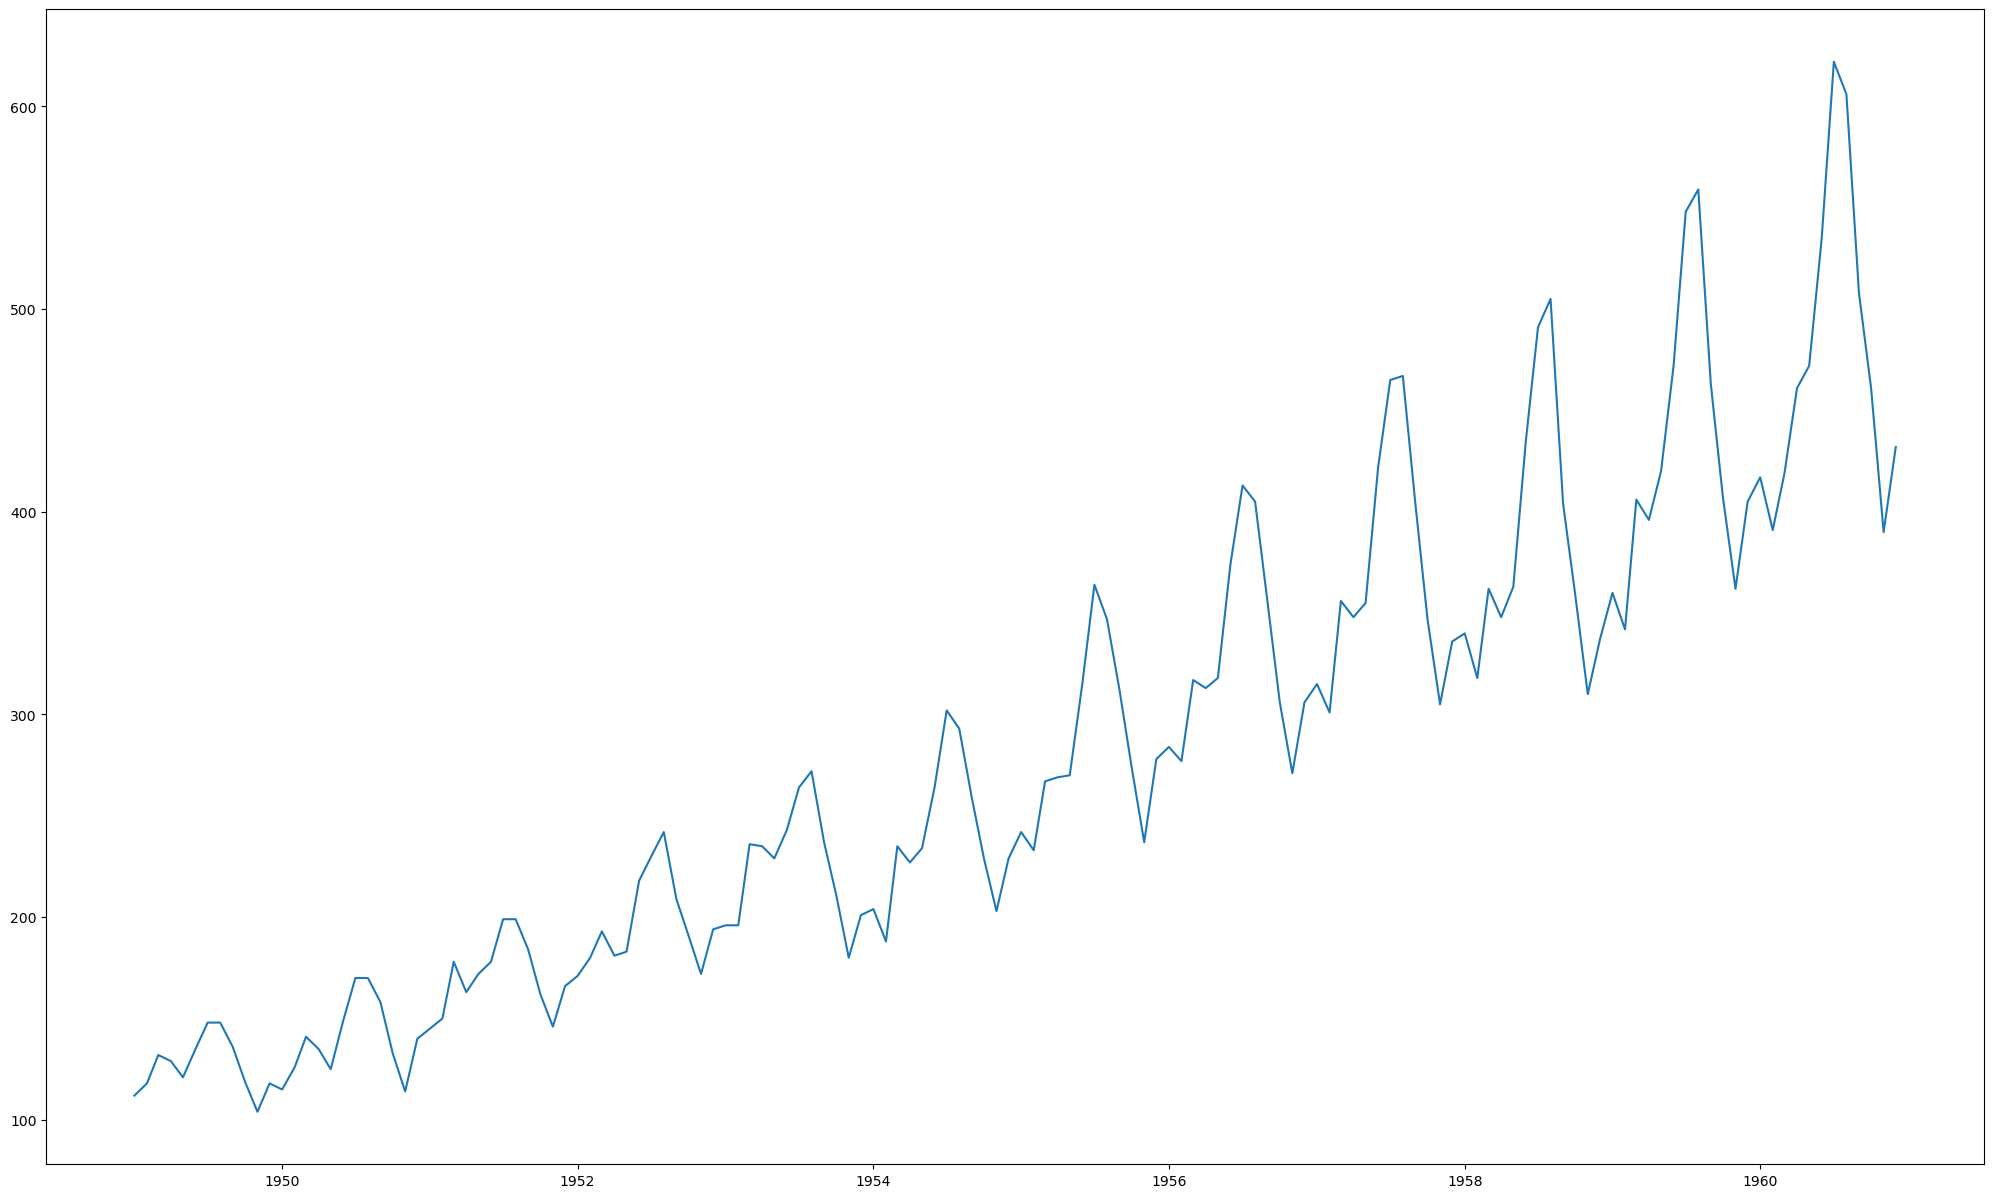

In [11]:
#EDA
plt.figure(figsize=(25,15),facecolor='white')
plt.plot(data)

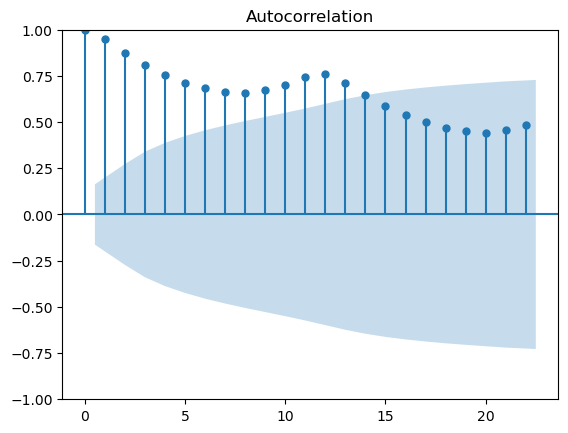

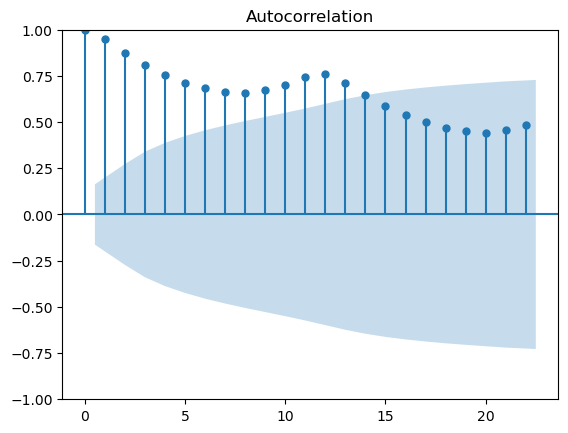

In [12]:
#autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [13]:
from statsmodels.tsa.stattools import adfuller 
dftest = adfuller(data.Passengers,autolag='AIC')
print('1. ADF : ', dftest[0])
print('2. P-Value : ', dftest[1])
print('3. NUM of Lags : ', dftest[2])
print('4. num of observations used for ADF Regression and Critical Values Calculations : ', dftest[3])
print('5. Critical Values : ')
for key, val in dftest[4].items():
    print("\t",key,":",val)
#For this P-value is greater than 0.5 so rejecting alternative hypothesis if less than 0.5 then rejecting null hypothesis
#where it is non stationary data in this case.

1. ADF :  0.8153688792060597
2. P-Value :  0.9918802434376411
3. NUM of Lags :  13
4. num of observations used for ADF Regression and Critical Values Calculations :  130
5. Critical Values : 
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598


In [14]:
data1=data.diff(periods=1)
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [15]:
data1

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [16]:
data1=data1.iloc[1:]
data1

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


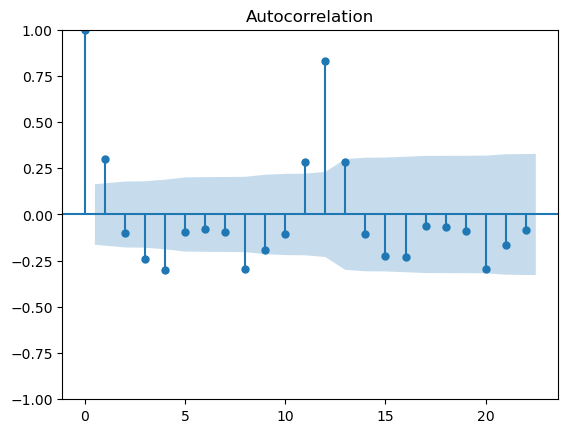

In [17]:
plot_acf(data1);

In [18]:
dftest = adfuller(data1.Passengers.diff().dropna(),autolag='AIC')
print('1. ADF : ', dftest[0])
print('2. P-Value : ', dftest[1])

1. ADF :  -16.384231542468527
2. P-Value :  2.732891850014085e-29


In [23]:
data2=data1.iloc[1:]
data2

,Passengers
Month,
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
1949-07-01,13.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


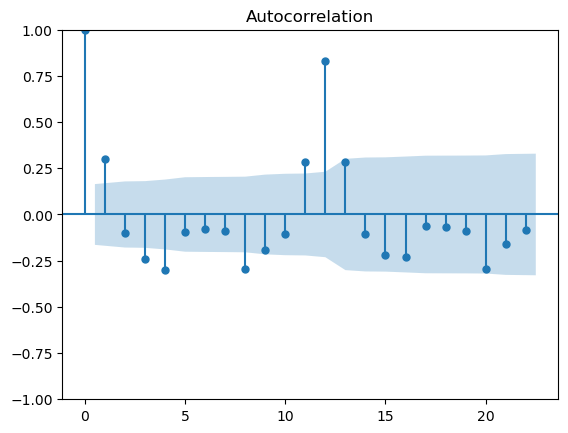

In [24]:
plot_acf(data2);

In [25]:
#ARIMA MODEL
#P-AUTO REGRESSOR ORDER
#D- DIFFERENCING ORDER
# Q -MOVING AVERAGE ORDER

In [26]:
data2.shape

(142, 1)

In [27]:
train=data2[:100]
test=data2[100:]

In [28]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [29]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:
model_arima = ARIMA(train,order=(1,0,1))
model_arima_fit =model_arima.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [32]:
predictions = model_arima_fit.forecast(steps=25)
predictions

1957-07-01    11.353727
1957-08-01    -1.754315
1957-09-01     5.874284
1957-10-01     1.434603
1957-11-01     4.018403
1957-12-01     2.514687
1958-01-01     3.389817
1958-02-01     2.880510
1958-03-01     3.176916
1958-04-01     3.004414
1958-05-01     3.104806
1958-06-01     3.046380
1958-07-01     3.080383
1958-08-01     3.060594
1958-09-01     3.072111
1958-10-01     3.065408
1958-11-01     3.069309
1958-12-01     3.067039
1959-01-01     3.068360
1959-02-01     3.067591
1959-03-01     3.068039
1959-04-01     3.067778
1959-05-01     3.067930
1959-06-01     3.067841
1959-07-01     3.067893
Freq: MS, Name: predicted_mean, dtype: float64

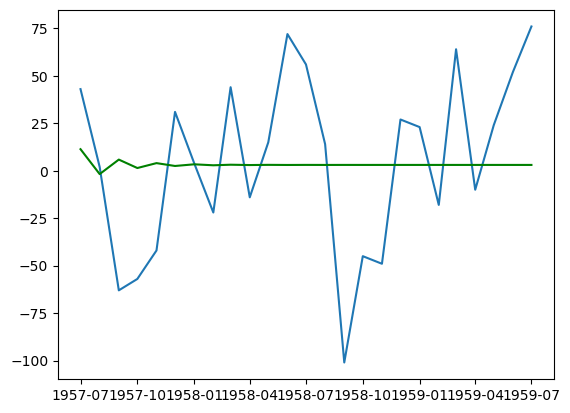

In [33]:
plt.plot(test[:25])
plt.plot(predictions,color='green')

In [34]:
##Getting optimal value for p,d,q
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
#AIC - IT IS A METRIC USED TO COMPARE MODELS AND SELECT THE BEST ONE BY BALANCING GOODNESS OF FIT AND MODEL COMPLEXITY 

In [36]:
import warnings 
warnings.filterwarnings('ignore')
list1=[]
list2=[]
for params in pdq:
    try:
        model_arima =ARIMA(train,order=params)
        model_arima_fit=model_arima.fit()
        print(params,model_arima_fit.aic)
        list1.append(params)
        list2.append(model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 925.2319778480472
(0, 0, 1) 920.103782658521
(0, 0, 2) 914.5152623701132
(0, 0, 3) 906.1430508894879
(0, 0, 4) 895.9270202616796
(0, 1, 0) 957.2398926102477
(0, 1, 1) 921.6194418667908
(0, 1, 2) 915.9393095308994
(0, 1, 3) 911.2608280006478
(0, 1, 4) 905.226003232129
(0, 2, 0) 1036.8976003114658
(0, 2, 1) 955.1502451715941
(0, 2, 2) 924.9372016754003
(0, 2, 3) 918.3865655669531
(0, 2, 4) 916.1665512204806
(0, 3, 0) 1133.1387768866434
(0, 3, 1) 1033.8802032541437
(0, 3, 2) 957.3683228119964
(0, 3, 3) 933.2614085145943
(0, 3, 4) 925.5201779326854
(0, 4, 0) 1235.3430410970177
(0, 4, 1) 1128.9258841680655
(0, 4, 2) 1034.6726280356381
(0, 4, 3) 963.4311478948116
(0, 4, 4) 949.2012317941007
(1, 0, 0) 922.9514843276155
(1, 0, 1) 913.9396583236554
(1, 0, 2) 902.0754434134365
(1, 0, 3) 903.6717203881026
(1, 0, 4) 897.7831656399815
(1, 1, 0) 952.4648177041199
(1, 1, 1) 918.8977055389742
(1, 1, 2) 910.1003155358342
(1, 1, 3) 912.0623019510139
(1, 1, 4) 913.6598366864815
(1, 2, 0) 1011.5

In [37]:
min(list2)

883.8822606661422

In [38]:
loc=list2.index(min(list2))

In [39]:
list1[loc]

(4, 0, 3)

In [40]:
model_arima = ARIMA(train, order=(4,0,3))
model_arima_fit=model_arima.fit()

In [41]:
print(model_arima_fit.aic)

883.8822606661422


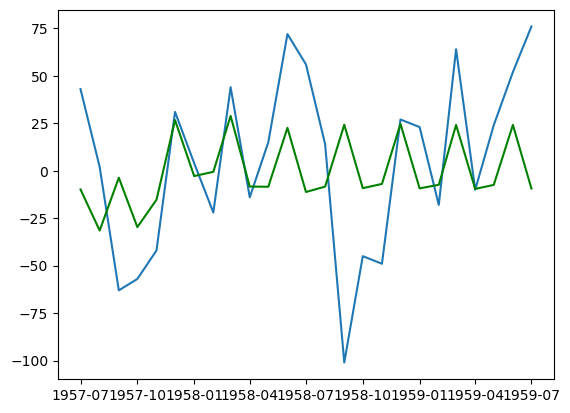

In [44]:
forecast25 = model_arima_fit.forecast(steps=25)
plt.plot(test[:25])
plt.plot(forecast25,color='green')

In [46]:
forecast25.shape

(25,)

In [47]:
test.shape

(42, 1)

In [50]:
test1=test[0:25].values.flatten()
test1.shape

(25,)

In [54]:
#Accuracy test
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tools.eval_measures import rmse

In [55]:
print(rmse(test1,forecast25))

43.91995594136808


In [56]:
mean_absolute_error(test1,forecast25)

33.94923977665699

In [58]:
import pickle

In [61]:
#with open('model_pickle','wb') as f:
    #pickle.dump(LR,f)

In [63]:
#with open('model_pickle','rb') as f:
  #  mp=pickle.load(f)